In [2]:
import pandas as pd

In [3]:
covid_df = pd.read_csv("covid19_Confirmed_dataset.csv")
happiness_df = pd.read_csv("worldwide_happiness_report.csv")

In [4]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
# Example aggregation
covid_agg = covid_df.groupby('Country/Region')[['Province/State', 'Lat']].sum().reset_index()


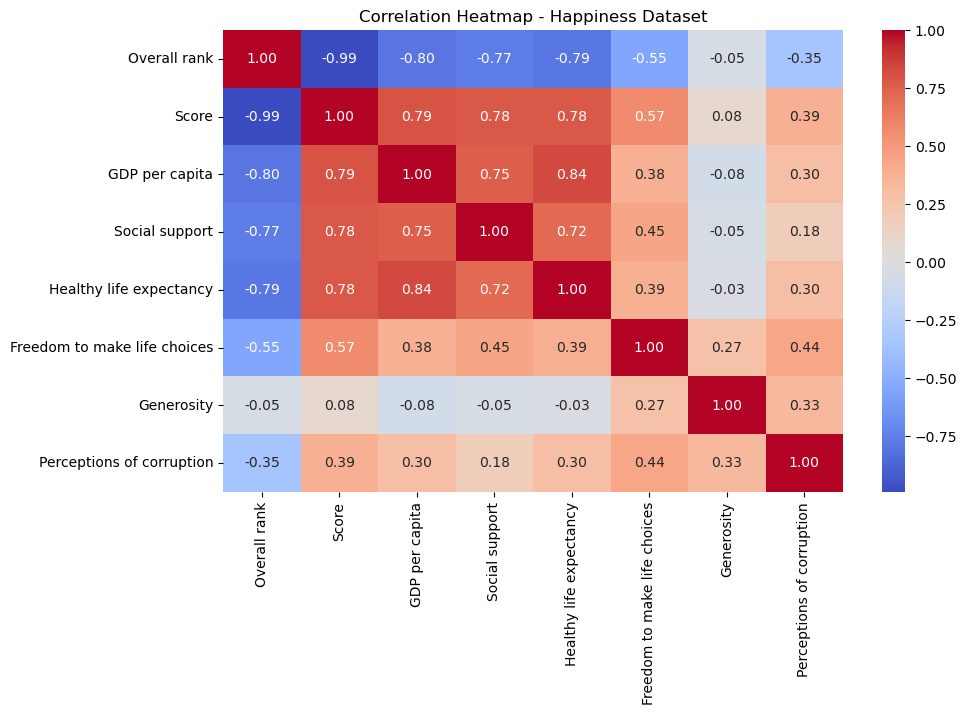

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = happiness_df.select_dtypes(include=['float64', 'int64'])

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Happiness Dataset")
plt.show()


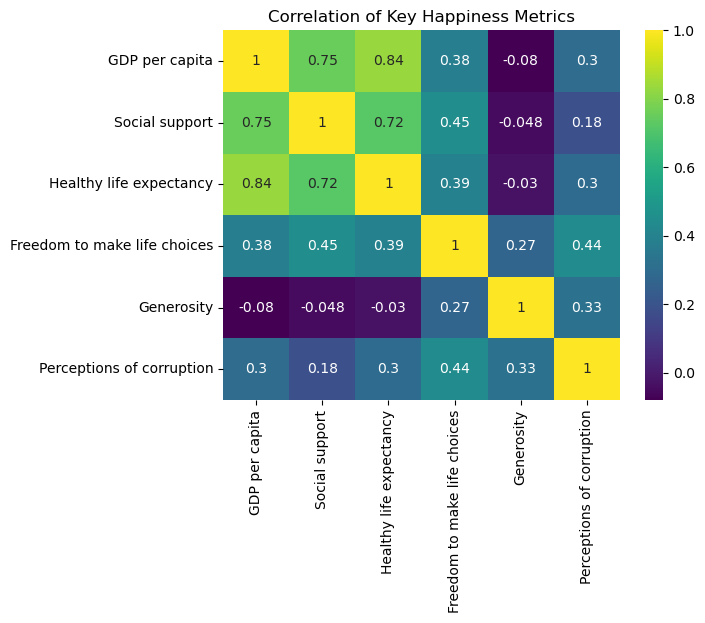

In [6]:
selected_cols = happiness_df[['GDP per capita', 'Social support', 'Healthy life expectancy', 
                              'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

sns.heatmap(selected_cols.corr(), annot=True, cmap='viridis')
plt.title("Correlation of Key Happiness Metrics")
plt.show()


In [7]:
print("Happiness Columns:\n", happiness_df.columns)
print("COVID Columns:\n", covid_agg.columns)


Happiness Columns:
 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
COVID Columns:
 Index(['Country/Region', 'Province/State', 'Lat'], dtype='object')


In [8]:
print("Happiness Columns:\n", happiness_df.columns)
print("COVID Columns:\n", covid_agg.columns)


Happiness Columns:
 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
COVID Columns:
 Index(['Country/Region', 'Province/State', 'Lat'], dtype='object')


In [9]:
# Standardize country column names
happiness_df.rename(columns={'Country or region': 'country'}, inplace=True)
covid_agg.rename(columns={'Country/Region': 'country'}, inplace=True)  # if needed


In [10]:
merged_df = pd.merge(happiness_df, covid_agg, on="country", how="inner")


Text(0.5, 1.0, 'GDP vs COVID-19 Death Rate')

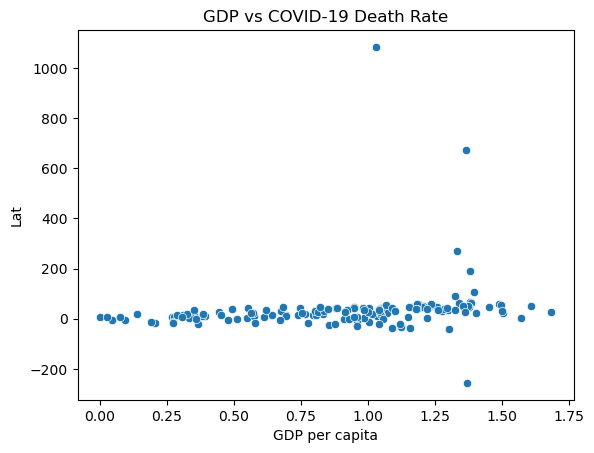

In [11]:
sns.scatterplot(data=merged_df, x='GDP per capita', y='Lat')
plt.title('GDP vs COVID-19 Death Rate')


In [12]:
print(merged_df.columns)



Index(['Overall rank', 'country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Province/State', 'Lat'],
      dtype='object')


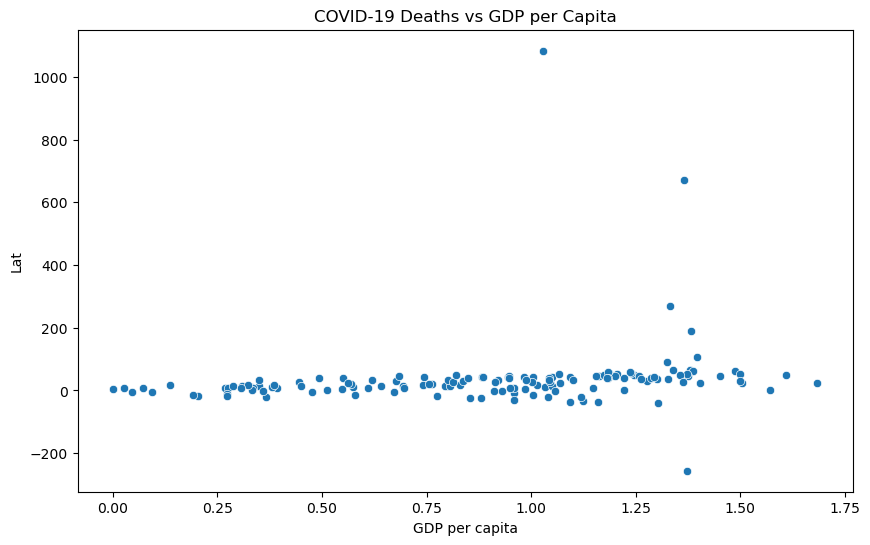

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(x='GDP per capita', y='Lat', data=merged_df)
plt.title('COVID-19 Deaths vs GDP per Capita')
plt.show()


<Axes: xlabel='Score', ylabel='Healthy life expectancy'>

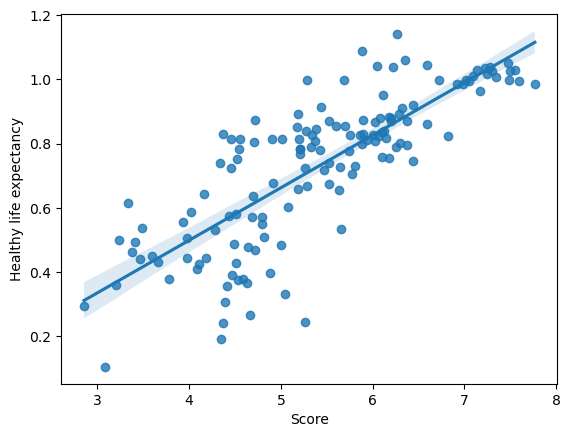

In [19]:
sns.regplot(x='Score', y='Healthy life expectancy', data=merged_df)


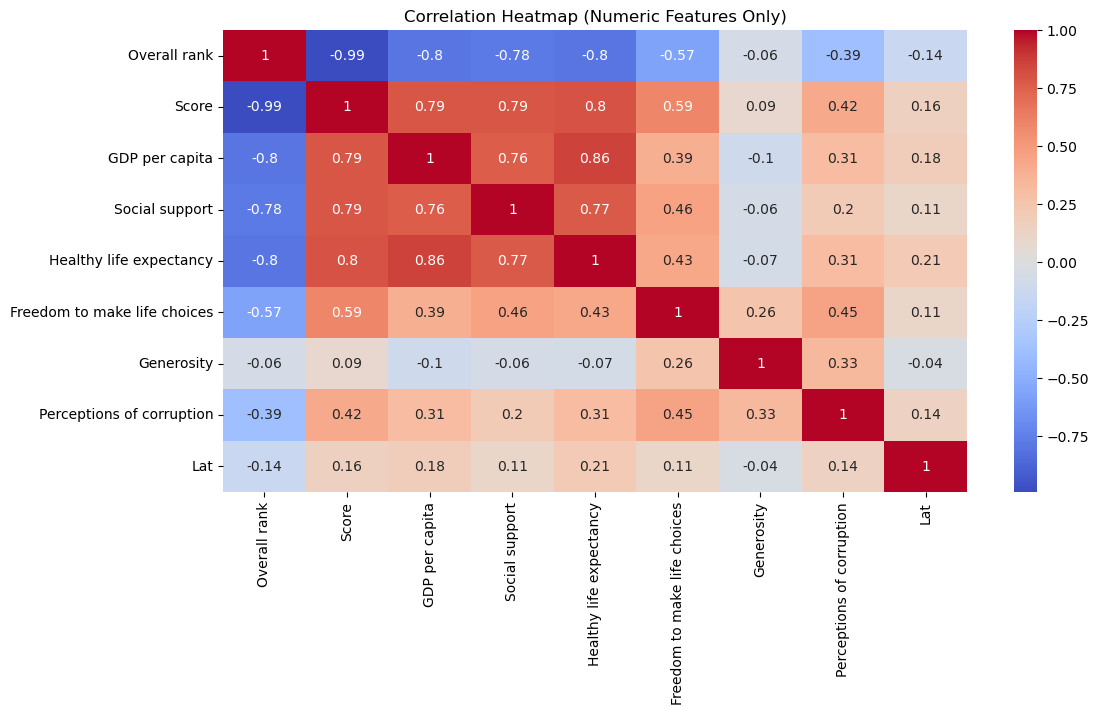

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns only
numeric_df = merged_df.select_dtypes(include='number')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr().round(2), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()
